<a href="https://colab.research.google.com/github/Karthikbv29/Batch108/blob/main/Karthik_Bhagavatula_RPL_FinalHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case**
##1. It is important for any company to keep their customers.
##2. When the customer leaves,the company not only lose the future revenue from this customer but also the resources spent to acquire the customer in the first place.
##3. Hence it is crucial for the company to know what are the various factors that are influencing the customer's decision to stay or leave the company
##4. To know more things about the factors which are influencing the customer's decisions,we are converting this business case to Machine Learning Problem.

# **Problem Statement**
##1. We have an idea about the business case or the potential challenge that is being faced by the retail company.
##2. To overcome the problem of Customer Churn, we need to satisfy the customers,as customer satisfaction leads to customer retention.
##3. We can satisfy the customer only if we know his/her choices and preferences
##4. By understanding the behaviour of customer,we can make suggestions to help the business
##5. We can understand the behaviour of customer using the transactions,interactions(email) data of the customers. 

# **Importing Libraries**

In [ ]:
import numpy as np # for numerical operations
import pandas as pd # for performing manipulations on dataframes
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import plotly.express as px
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from typing import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,confusion_matrix,classification_report

# **Reading the excel files**

In [ ]:
cust_train=pd.read_excel('/content/Customerdata_Train.xlsx')
transaction_train=pd.read_excel('/content/transactionsdata_Train.xlsx')
email_train=pd.read_excel('/content/Emaildata_Train.xlsx')
train=pd.read_excel('/content/Train.xlsx')

In [ ]:
cust_test=pd.read_excel('/content/Customerdata_Test.xlsx')
transaction_test=pd.read_excel('/content/transactionsdata_Test.xlsx')
email_test=pd.read_excel('/content/Emaildata_Test.xlsx')
test=pd.read_excel('/content/Test.xlsx')

#  **Data Exploration**

In [ ]:
print(cust_train.shape)
print(email_train.shape)
print(transaction_train.shape)
print(train.shape)

(23820, 7)
(517672, 6)
(104755, 4)
(23820, 2)


In [ ]:
print(cust_test.shape)
print(transaction_test.shape)
print(email_test.shape)
print(test.shape)

(5955, 7)
(26768, 4)
(129074, 6)
(5955, 1)


In [ ]:
# to view the records of the Customer Train data
cust_train.head() 

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [ ]:
# to view the records of the Email Train data
email_train.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [ ]:
email_train.MailClicked.value_counts()

no               466011
yes               27841
NotApplicable     23820
Name: MailClicked, dtype: int64

in general sense,all the welcome mails are sent to the customer on the day of registration that's why all those welcome mails are categorized as NotApplicable under MailClicked column

In [ ]:
transaction_train.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [ ]:
transaction_train['Year of Order']=pd.to_datetime(transaction_train['DateOfOrder']).dt.year

In [ ]:
# to view the records of the Train data
train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


## **Checking for Missing values**

In [ ]:
# checking for any missing values in Customer train data
cust_train.isna().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
# checking for any missing values in transaction train data
transaction_train.isna().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
Year of Order    0
dtype: int64

In [ ]:
# checking for any missing values in email train data
email_train.isna().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
# checking for any missing values in train data
train.isna().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

## **Feature Engineering on Train Data**

In [ ]:
cust_data=pd.merge(cust_train,train,on=['CustomerID'],how='inner')
cust_data.shape

(23820, 8)

I have merged the customer train data and train data first,as they contain same number of rows.

In [ ]:
cust_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,Low


In [ ]:
df1=cust_data.copy()
gf1=df1.groupby('CustomerID').sum()
gf1

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
CustomerID,,,
C12116,0,0,0
C12117,1,0,0
C12118,1,0,0
C12119,0,0,0
C12120,1,0,0
...,...,...,...
C42185,0,0,0
C42186,1,0,0
C42187,1,0,0


In [ ]:
df2=transaction_train.copy()
df2['Number of Orders']=1
df2=df2.drop(['Year of Order'],axis=1)
gf2=df2.groupby('CustomerID').sum()
gf2

,OrderQuantity,Number of Orders
CustomerID,,
C12116,115,3
C12117,41,1
C12118,41,1
C12119,52,1
C12120,31,1
...,...,...
C42185,1340,13
C42186,46,1
C42187,41,1


in the above cell, I have copied the transaction_train dataframe to a new variable df2 and added a new column to it with a constant value of 1.
The number of records in Transaction data are **104755** means **104755** transactions have taken place.So I have extracted a new feature 'Number of Orders' which gives us the count of number of transactions made by each customer.

In [ ]:
cust=pd.merge(gf1,gf2,left_on='CustomerID',right_index=True)
cust

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders
CustomerID,,,,,
C12116,0,0,0,115,3
C12117,1,0,0,41,1
C12118,1,0,0,41,1
C12119,0,0,0,52,1
C12120,1,0,0,31,1
...,...,...,...,...,...
C42185,0,0,0,1340,13
C42186,1,0,0,46,1
C42187,1,0,0,41,1


In [ ]:
cust.reset_index()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders
0,C12116,0,0,0,115,3
1,C12117,1,0,0,41,1
2,C12118,1,0,0,41,1
3,C12119,0,0,0,52,1
4,C12120,1,0,0,31,1
...,...,...,...,...,...,...
23815,C42185,0,0,0,1340,13
23816,C42186,1,0,0,46,1
23817,C42187,1,0,0,41,1
23818,C42188,0,0,0,51,1


In [ ]:
cust1=pd.merge(cust,cust_data,on=['CustomerID','OnlineCommunication','AutomaticRefill','DoorstepDelivery'],how='inner')
cust1.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders,City,DateOfRegistration,PreferredDeliveryDay,RetentionPotential
0,C12116,0,0,0,115,3,CITY3,2013-09-23,Friday,Low
1,C12117,1,0,0,41,1,CITY2,2013-12-05,Friday,Low
2,C12118,1,0,0,41,1,CITY4,2013-09-10,Wednesday,High
3,C12119,0,0,0,52,1,CITY2,2013-04-13,Monday,Low
4,C12120,1,0,0,31,1,CITY3,2014-01-10,Tuesday,Low


In [ ]:
df3=email_train.copy()
df3['Number of Emails']=1
df3=df3.drop(['timestamp'],axis=1)

In [ ]:
gf3=df3.groupby('CustomerID').sum()
gf3['Number of Welcome Emails']=1
gf3['Number of Customized Emails']=abs(1-gf3['Number of Emails'])
gf3

,Number of Emails,Number of Welcome Emails,Number of Customized Emails
CustomerID,,,
C12116,32,1,31
C12117,1,1,0
C12118,1,1,0
C12119,42,1,41
C12120,1,1,0
...,...,...,...
C42185,44,1,43
C42186,1,1,0
C42187,1,1,0


in the above cell, I have copied the email_train dataframe to a new variable email and added a new column to it with a constant value of 1.
The number of records in Email data are **517672** means **517672** mails have been sent so far.So I have extracted a new feature 'Number of Emails' which gives us the count of number of emails sent to each customer.

In [ ]:
gf3.reset_index()

,CustomerID,Number of Emails,Number of Welcome Emails,Number of Customized Emails
0,C12116,32,1,31
1,C12117,1,1,0
2,C12118,1,1,0
3,C12119,42,1,41
4,C12120,1,1,0
...,...,...,...,...
23815,C42185,44,1,43
23816,C42186,1,1,0
23817,C42187,1,1,0
23818,C42188,1,1,0


In [ ]:
final_train=pd.merge(cust1,gf3,on=['CustomerID'],how='inner')
final_train

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders,City,DateOfRegistration,PreferredDeliveryDay,RetentionPotential,Number of Emails,Number of Welcome Emails,Number of Customized Emails
0,C12116,0,0,0,115,3,CITY3,2013-09-23,Friday,Low,32,1,31
1,C12117,1,0,0,41,1,CITY2,2013-12-05,Friday,Low,1,1,0
2,C12118,1,0,0,41,1,CITY4,2013-09-10,Wednesday,High,1,1,0
3,C12119,0,0,0,52,1,CITY2,2013-04-13,Monday,Low,42,1,41
4,C12120,1,0,0,31,1,CITY3,2014-01-10,Tuesday,Low,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,1340,13,CITY2,2011-03-03,Tuesday,Low,44,1,43
23816,C42186,1,0,0,46,1,CITY4,2013-11-23,Friday,High,1,1,0
23817,C42187,1,0,0,41,1,CITY2,2013-09-15,Tuesday,High,1,1,0
23818,C42188,0,0,0,51,1,CITY4,2011-10-04,Friday,Low,1,1,0


In [ ]:
condition=[(final_train['Number of Welcome Emails']==1)&(final_train['Number of Customized Emails']==0),
           (final_train['Number of Welcome Emails']==1)&(final_train['Number of Customized Emails']!=0)]
values=['No','Yes']
final_train['Regular Interaction']=np.select(condition,values)  
#or 
#final_train['Regular Interaction']=['Yes' if x > 1 else 'No' for x in final_train['Number of Emails']]
final_train

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders,City,DateOfRegistration,PreferredDeliveryDay,RetentionPotential,Number of Emails,Number of Welcome Emails,Number of Customized Emails,Regular Interaction
0,C12116,0,0,0,115,3,CITY3,2013-09-23,Friday,Low,32,1,31,Yes
1,C12117,1,0,0,41,1,CITY2,2013-12-05,Friday,Low,1,1,0,No
2,C12118,1,0,0,41,1,CITY4,2013-09-10,Wednesday,High,1,1,0,No
3,C12119,0,0,0,52,1,CITY2,2013-04-13,Monday,Low,42,1,41,Yes
4,C12120,1,0,0,31,1,CITY3,2014-01-10,Tuesday,Low,1,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,1340,13,CITY2,2011-03-03,Tuesday,Low,44,1,43,Yes
23816,C42186,1,0,0,46,1,CITY4,2013-11-23,Friday,High,1,1,0,No
23817,C42187,1,0,0,41,1,CITY2,2013-09-15,Tuesday,High,1,1,0,No
23818,C42188,0,0,0,51,1,CITY4,2011-10-04,Friday,Low,1,1,0,No


In [ ]:
final_train['Regular Customer']=['Yes' if x > 1 else 'No' for x in final_train['Number of Orders']]
final_train

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders,City,DateOfRegistration,PreferredDeliveryDay,RetentionPotential,Number of Emails,Number of Welcome Emails,Number of Customized Emails,Regular Interaction,Regular Customer
0,C12116,0,0,0,115,3,CITY3,2013-09-23,Friday,Low,32,1,31,Yes,Yes
1,C12117,1,0,0,41,1,CITY2,2013-12-05,Friday,Low,1,1,0,No,No
2,C12118,1,0,0,41,1,CITY4,2013-09-10,Wednesday,High,1,1,0,No,No
3,C12119,0,0,0,52,1,CITY2,2013-04-13,Monday,Low,42,1,41,Yes,No
4,C12120,1,0,0,31,1,CITY3,2014-01-10,Tuesday,Low,1,1,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,1340,13,CITY2,2011-03-03,Tuesday,Low,44,1,43,Yes,Yes
23816,C42186,1,0,0,46,1,CITY4,2013-11-23,Friday,High,1,1,0,No,No
23817,C42187,1,0,0,41,1,CITY2,2013-09-15,Tuesday,High,1,1,0,No,No
23818,C42188,0,0,0,51,1,CITY4,2011-10-04,Friday,Low,1,1,0,No,No


In [ ]:
final_train['Regular Customer'].value_counts()

No     14972
Yes     8848
Name: Regular Customer, dtype: int64

In [ ]:
mc=email_train.copy()
mc['delimiter']='z'
mc['MailClicked']=mc['MailClicked']+mc['delimiter']
mc1=mc.groupby(['CustomerID']).sum()
mc1['MailClicked']=mc1['MailClicked'].str.split('z',expand=False)
mc1

,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,delimiter
CustomerID,,,,,,
C12116,2013-09-232013-10-092013-09-302013-10-062013-1...,WelcomeEmailCustomizedEmailCustomizedEmailCust...,12:51:5210:32:5216:34:1012:20:4617:21:2417:02:...,yesnonononononononononoyesyesnonononononononon...,"[NotApplicable, no, no, no, no, no, no, no, no...",zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
C12117,2013-12-05,WelcomeEmail,15:59:30,yes,"[NotApplicable, ]",z
C12118,2013-09-10,WelcomeEmail,14:49:14,yes,"[NotApplicable, ]",z
C12119,2013-04-132013-07-132013-06-142013-10-212013-0...,WelcomeEmailCustomizedEmailCustomizedEmailCust...,15:39:0215:18:0012:16:4810:24:2412:37:1614:47:...,yesnononononononoyesnoyesyesyesyesnoyesnonoyes...,"[NotApplicable, no, no, no, no, no, no, no, no...",zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
C12120,2014-01-10,WelcomeEmail,11:40:10,yes,"[NotApplicable, ]",z
...,...,...,...,...,...,...
C42185,2011-03-032011-12-282011-09-262011-09-302011-0...,WelcomeEmailCustomizedEmailCustomizedEmailCust...,17:54:5210:50:1016:13:5810:33:1611:29:2811:38:...,yesnononononoyesnononononononononononoyesnonon...,"[NotApplicable, no, no, no, no, no, no, no, no...",zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
C42186,2013-11-23,WelcomeEmail,17:28:20,yes,"[NotApplicable, ]",z
C42187,2013-09-15,WelcomeEmail,15:15:34,yes,"[NotApplicable, ]",z


In [ ]:
from typing import Counter
list1=Counter(mc1['MailClicked'].values[0])
df=pd.DataFrame(list1,index=[0])
for i in range(1,23820):
    list2=Counter(mc1['MailClicked'].values[i])
    df=df.append(list2,ignore_index=True)
df

,NotApplicable,no,yes,
0,1.0,29.0,2.0,1.0
1,1.0,NaN,NaN,1.0
2,1.0,NaN,NaN,1.0
3,1.0,37.0,4.0,1.0
4,1.0,NaN,NaN,1.0
...,...,...,...,...
23815,1.0,43.0,NaN,1.0
23816,1.0,NaN,NaN,1.0
23817,1.0,NaN,NaN,1.0
23818,1.0,NaN,NaN,1.0


In [ ]:
df=df.iloc[:,:-1]
df=df.fillna(0)
df

,NotApplicable,no,yes
0,1.0,29.0,2.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,37.0,4.0
4,1.0,0.0,0.0
...,...,...,...
23815,1.0,43.0,0.0
23816,1.0,0.0,0.0
23817,1.0,0.0,0.0
23818,1.0,0.0,0.0


In [ ]:
final_train=pd.concat([final_train,df],axis=1,join='inner')#run only once,running many times leads to duplication of columns

In [ ]:
final_train

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders,City,DateOfRegistration,PreferredDeliveryDay,RetentionPotential,Number of Emails,Number of Welcome Emails,Number of Customized Emails,Regular Interaction,Regular Customer,NotApplicable,no,yes
0,C12116,0,0,0,115,3,CITY3,2013-09-23,Friday,Low,32,1,31,Yes,Yes,1.0,29.0,2.0
1,C12117,1,0,0,41,1,CITY2,2013-12-05,Friday,Low,1,1,0,No,No,1.0,0.0,0.0
2,C12118,1,0,0,41,1,CITY4,2013-09-10,Wednesday,High,1,1,0,No,No,1.0,0.0,0.0
3,C12119,0,0,0,52,1,CITY2,2013-04-13,Monday,Low,42,1,41,Yes,No,1.0,37.0,4.0
4,C12120,1,0,0,31,1,CITY3,2014-01-10,Tuesday,Low,1,1,0,No,No,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,1340,13,CITY2,2011-03-03,Tuesday,Low,44,1,43,Yes,Yes,1.0,43.0,0.0
23816,C42186,1,0,0,46,1,CITY4,2013-11-23,Friday,High,1,1,0,No,No,1.0,0.0,0.0
23817,C42187,1,0,0,41,1,CITY2,2013-09-15,Tuesday,High,1,1,0,No,No,1.0,0.0,0.0
23818,C42188,0,0,0,51,1,CITY4,2011-10-04,Friday,Low,1,1,0,No,No,1.0,0.0,0.0


## **Exploratory Data Analysis**

In [ ]:
df4=final_train.copy()
gf4=df4.groupby('RetentionPotential').sum()
gf4=gf4.sort_values('Number of Emails',ascending=False)
gf4

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,Number of Orders,Number of Emails,Number of Welcome Emails,Number of Customized Emails,NotApplicable,no,yes
RetentionPotential,,,,,,,,,,,
Low,13445,2137,845,7149942,87499,499466,19185,480281,19185.0,453376.0,26905.0
High,1863,0,19,286173,5150,13810,3756,10054,3756.0,9443.0,611.0
Medium,423,119,32,1082463,12106,4396,879,3517,879.0,3192.0,325.0


In [ ]:
px.bar(gf4,y='Number of Emails',template='plotly_dark')

Text(0.5, 1.0, 'Customers Preference over Online Communication')

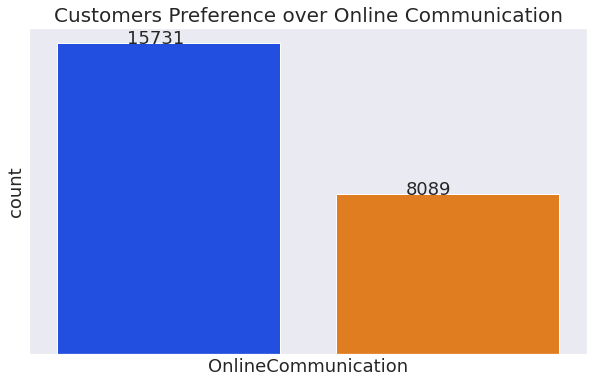

In [ ]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='OnlineCommunication',order=final_train['OnlineCommunication'].value_counts().index,palette='bright')
ax.set_xticks([])
ax.set_yticks([])
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Customers Preference over Online Communication',fontsize=20)

Above plot shows that majority of the customers are preferring Online Communication,so we can suggest the company to invest in the marketing


Text(0.5, 1.0, 'Customers Preference over Doorstep Delivery')

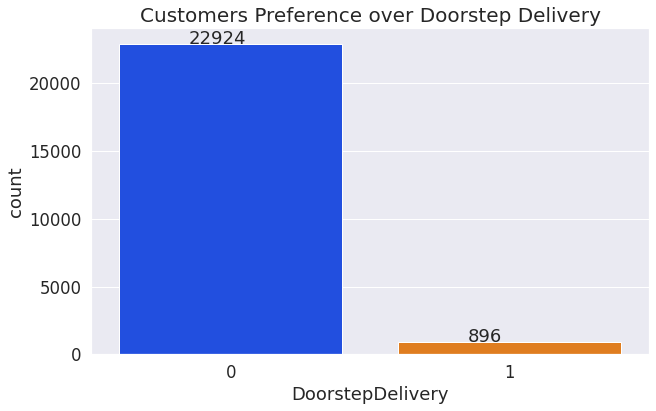

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='DoorstepDelivery',palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Customers Preference over Doorstep Delivery',fontsize=20)

This shows that most of the customers are preferring to come and purchase the products by themselves instead of opting for Doorstep Delivery

Text(0.5, 1.0, 'Customers Preference over Automatic Refill')

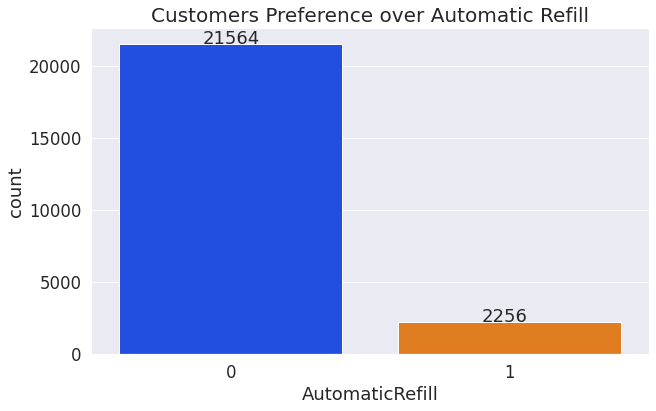

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='AutomaticRefill',palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.3,p.get_height()+0.01))
plt.title('Customers Preference over Automatic Refill',fontsize=20)

Many customers are not opting for Automatic Refill, instead they are choosing to come to retail store and manually select the items/products offered by the store.

Text(0.5, 1.0, 'Preferred Delivery Day of Customers')

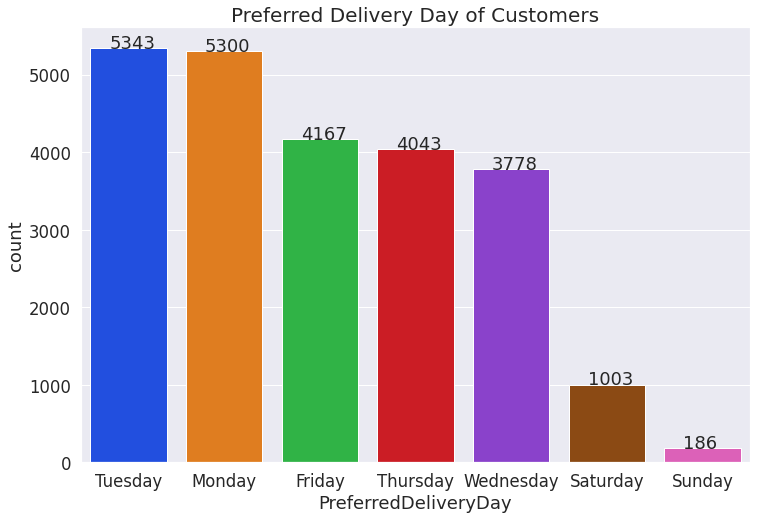

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=final_train,x='PreferredDeliveryDay',order=final_train['PreferredDeliveryDay'].value_counts().index,palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.2,p.get_height()))
plt.title('Preferred Delivery Day of Customers',fontsize=20)

By looking at the graph, we can say that many customers are preferring Tuesday to get their products delivered and only a few customers are preferring Sunday as delivery day.

In [ ]:
city_orders=final_train.copy()
city=city_orders.groupby('City').sum()
city1=city.sort_values(['OrderQuantity'],ascending=False)
city1=city1.drop(['OnlineCommunication','AutomaticRefill','DoorstepDelivery'],axis=1)
city1

,OrderQuantity,Number of Orders,Number of Emails,Number of Welcome Emails,Number of Customized Emails,NotApplicable,no,yes
City,,,,,,,,
CITY2,4380420,48860,154501,6879,147622,6879.0,140195.0,7427.0
CITY4,2778114,36563,192464,9143,183321,9143.0,174078.0,9243.0
CITY3,1098124,15700,138331,6490,131841,6490.0,122825.0,9016.0
CITY1,261920,3632,32376,1308,31068,1308.0,28913.0,2155.0


From above grouped data, the feature 'Number of Welcome Emails' gives us the count of Registered Customers across the cities.

In [ ]:
fig=px.bar(city1,y='OrderQuantity',template='none',title='Order Quantities across the Cities')
fig.update_layout(
    font=dict(
        size=18,color="RebeccaPurple"
    )
)
fig.show()
#['ggplot2','seaborn','simply_white','plotly','plotly_white','plotly_dark','presentation','xgridoff','ygridoff','gridon','none'] 
#  are the various other templates that we can use in this plot.

Customers from City2 and City4 have purchased a total of **71,58,534** products,which is almost **84%** of the total revenue generated from across all the 4 cities.

In [ ]:
city2=city.reset_index()

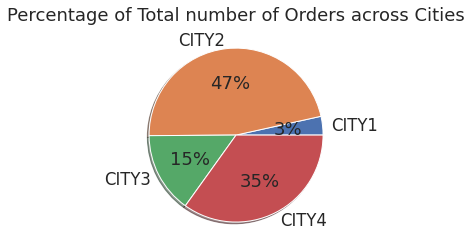

In [ ]:
plt.pie(city2['Number of Orders'],labels=city2['City'],autopct='%1.0f%%',shadow=True)
plt.title('Percentage of Total number of Orders across Cities')
plt.show()

In [ ]:
email=city.sort_values(['Number of Welcome Emails'],ascending=False)
email=email.reset_index()

Text(0.5, 1.0, 'Number of Customers from each city')

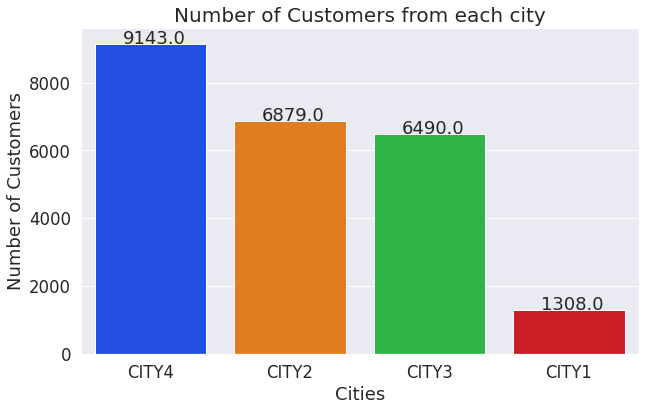

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=email,x='City',y='Number of Welcome Emails',palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.2,p.get_height()))
plt.xlabel('Cities')
plt.ylabel('Number of Customers')
plt.title('Number of Customers from each city',fontsize=20)

Text(0.5, 1.0, 'Regular Customers Count')

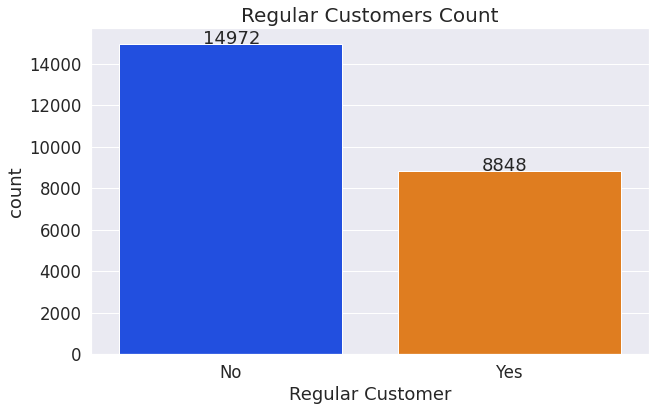

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='Regular Customer',palette='bright',order=final_train['Regular Customer'].value_counts().index)
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.3,p.get_height()))
plt.title('Regular Customers Count',fontsize=20)

Text(0.5, 1.0, 'Regular Interaction with Customers')

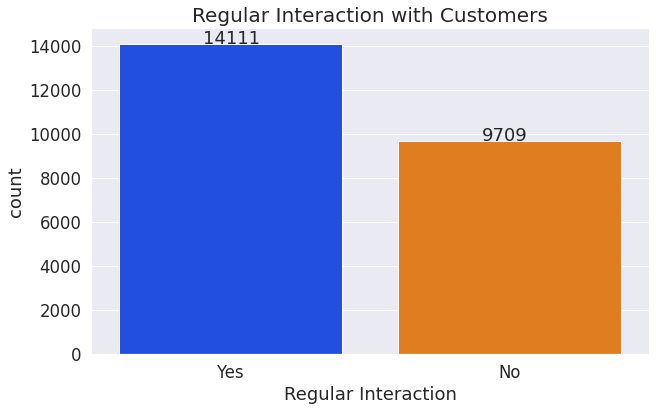

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='Regular Interaction',palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.3,p.get_height()))
plt.title('Regular Interaction with Customers',fontsize=20)

In [ ]:
df5=transaction_train.copy()
df5['Number of Orders']=1
gf5=df5.groupby('Year of Order').sum()
gf5

,OrderQuantity,Number of Orders
Year of Order,,
2008,1237,34
2009,35371,529
2010,276890,3500
2011,1287628,14999
2012,1812969,20193
2013,3186085,41240
2014,328548,4510
2015,328761,3778
2016,447635,5065


In [ ]:
gf5.reset_index()

,Year of Order,OrderQuantity,Number of Orders
0,2008,1237,34
1,2009,35371,529
2,2010,276890,3500
3,2011,1287628,14999
4,2012,1812969,20193
5,2013,3186085,41240
6,2014,328548,4510
7,2015,328761,3778
8,2016,447635,5065
9,2017,739904,9868


Text(0.5, 1.0, 'Order Quantities across each year')

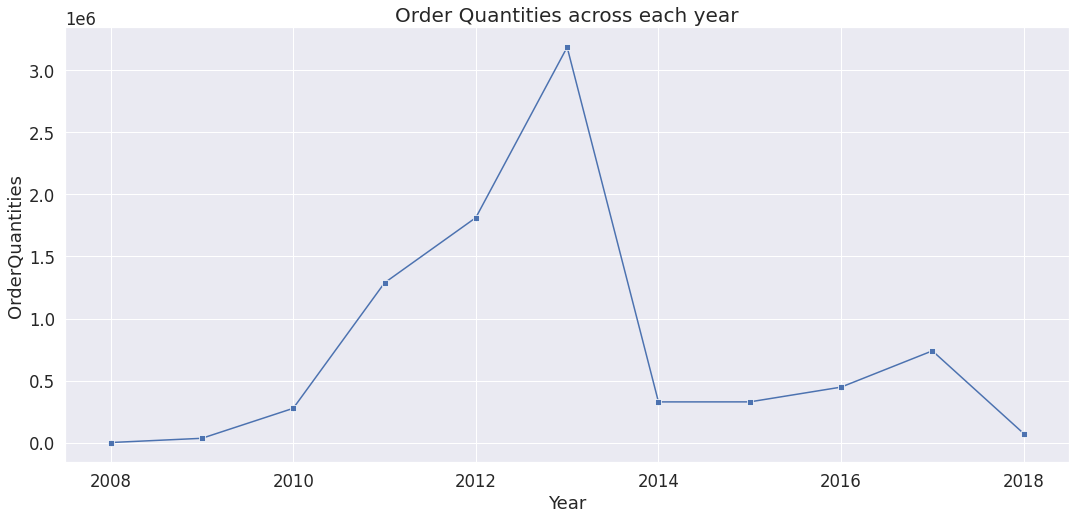

In [ ]:
plt.figure(figsize=(18,8))
ax=sns.lineplot(x='Year of Order',y='OrderQuantity',data=gf5,marker='s')
plt.xlabel('Year')
plt.ylabel('OrderQuantities')  
plt.title('Order Quantities across each year',fontsize=20)

From the above plot,
There is an exponential rise in the number of products being ordered/order quantity from 2008 to 2013 and after 2013,there has been a sharp decline till 2014 and again from 2014 to 2017,there is a rise of Order Quantity of products,and count reduced again from 2017 to 2018.
We can say that the most number of products have been purchased in the year 2013 i.e.,**3186085** products.
There is a huge fall in the Quantity of products ordered from 2013 to 2014 from 31 lakh products to 3 lakh products

Text(0.5, 1.0, 'Number of Orders per each year')

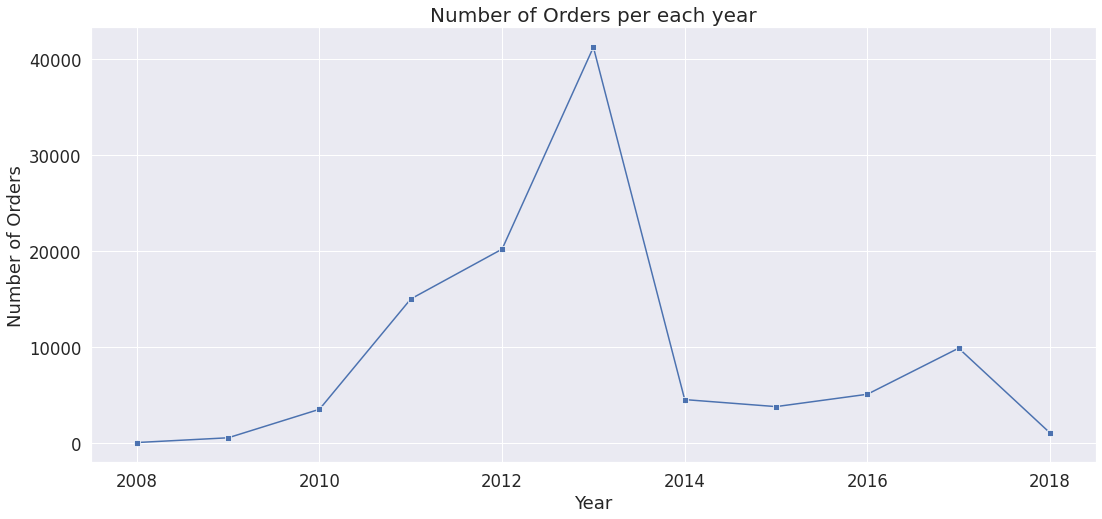

In [ ]:
plt.figure(figsize=(18,8))
ax=sns.lineplot(x='Year of Order',y='Number of Orders',data=gf5,marker='s')
plt.xlabel('Year')
plt.ylabel('Number of Orders')  
plt.title('Number of Orders per each year',fontsize=20)

The above plot is similar to Year Vs Order Quantities plot with most number of orders in the year 2013 (41240 orders) and least number of orders in the year 2008 (34 orders)

Text(0.5, 1.0, 'Retention Potential of Customers with Regular Interaction')

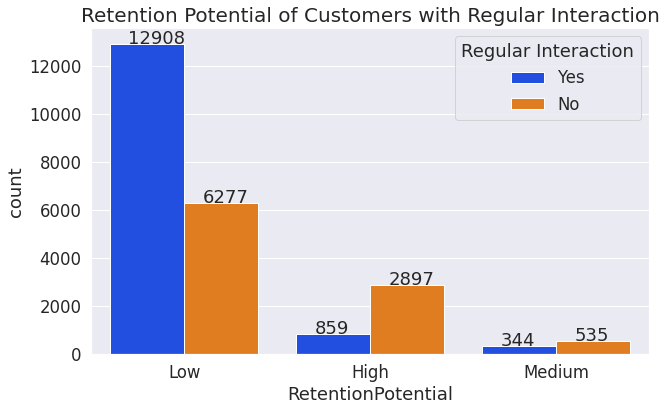

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='RetentionPotential',hue='Regular Interaction',palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.1,p.get_height()+0.01))
plt.title('Retention Potential of Customers with Regular Interaction',fontsize=20)

Above plot shows that even after regular interactions with the customers, many customers are still favoring to move to other retail stores.
From this,we can say that the Emails are not very effective to convince the customers to stay with the company.
We can suggest the company to provide rewards for those customers who are loyal to the company.
By doing so we can attract **Medium Retention Potential** customers to our side. 

Text(0.5, 1.0, 'Retention Potential of Customers')

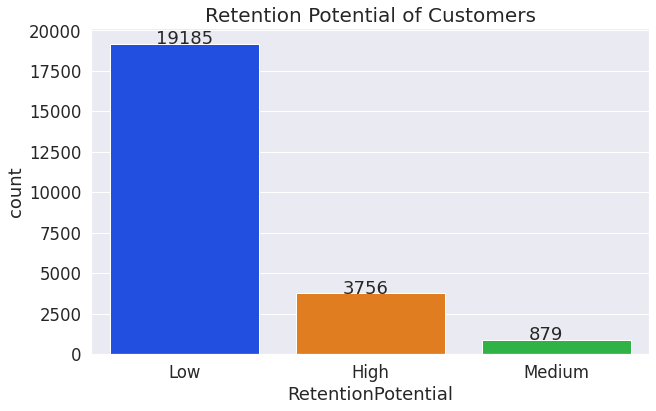

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=final_train,x='RetentionPotential',order=final_train['RetentionPotential'].value_counts().index,palette='bright')
for p in ax.patches:
  ax.annotate(format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Retention Potential of Customers',fontsize=20)

From the above plot,we can say that the class of target variable i.e., Retention Potential is highly imbalanced.
Hence, we cannot use accuracy as an error metric.

In [ ]:
final_train=final_train.drop(['DateOfRegistration','CustomerID','NotApplicable','Number of Welcome Emails'],axis=1)

In [ ]:
num_cols=['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'OrderQuantity', 'Number of Orders','Number of Emails',
       'Number of Customized Emails','no','yes']
cat_cols=['City','PreferredDeliveryDay','Regular Customer','Regular Interaction']
final_train['RetentionPotential']=final_train['RetentionPotential'].astype('category')
for col in cat_cols:
  final_train[col]=final_train[col].astype('category')

In [ ]:
print(final_train.dtypes)

OnlineCommunication               int64
AutomaticRefill                   int64
DoorstepDelivery                  int64
OrderQuantity                     int64
Number of Orders                  int64
City                           category
PreferredDeliveryDay           category
RetentionPotential             category
Number of Emails                  int64
Number of Customized Emails       int64
Regular Interaction            category
Regular Customer               category
no                              float64
yes                             float64
dtype: object


In [ ]:
x=final_train.drop(['RetentionPotential'],axis=1)
y=final_train['RetentionPotential']
print(x.shape)
print(y.shape)

(23820, 13)
(23820,)


In [ ]:
sample=pd.read_csv('/content/sf_91-by-209-1631595850201-1.csv')
sample['RetentionPotential'].value_counts()

2    4793
0     946
1     216
Name: RetentionPotential, dtype: int64

Here,we are refering to the samplesubmission.csv file,so that we can appropriately label our classes present in the target variable.

In [ ]:
std=StandardScaler()
x_num=std.fit_transform(x[num_cols])

In [ ]:
ohe=OneHotEncoder()
x_cat=ohe.fit_transform(x[cat_cols]).toarray()

In [ ]:
x=np.concatenate([x_num,x_cat],axis=1)

In [ ]:
y=y.replace(('Low','Medium','High'),(2,1,0))

In [ ]:
print(x.shape)
print(y.shape)
y

(23820, 24)
(23820,)


0        2
1        2
2        0
3        2
4        2
        ..
23815    2
23816    0
23817    0
23818    2
23819    2
Name: RetentionPotential, Length: 23820, dtype: int64

## **Feature Engg on Test Data**

In [ ]:
cust_data2=pd.merge(cust_test,test,on=['CustomerID'],how='inner')
cust_data2.shape

In [ ]:
df_1=cust_data2.copy()
gf_1=df_1.groupby('CustomerID').sum()
gf_1

In [ ]:
df_2=transaction_test.copy()
df_2['Number of Orders']=1
gf_2=df_2.groupby('CustomerID').sum()
gf_2

In [ ]:
cust_=pd.merge(gf_1,gf_2,left_on='CustomerID',right_index=True)
cust_

In [ ]:
cust_.reset_index()

In [ ]:
cust_1=pd.merge(cust_,cust_data2,on=['CustomerID','OnlineCommunication','AutomaticRefill','DoorstepDelivery'],how='inner')
cust_1

In [ ]:
email_=email_test.copy()
email_['Number of Emails']=1
email_=email_.drop(['timestamp'],axis=1)

In [ ]:
gf_3=email_.groupby('CustomerID').sum()
gf_3['Number of Welcome Emails']=1
gf_3['Number of Customized Emails']=abs(1-gf_3['Number of Emails'])
gf_3

In [ ]:
gf_3.reset_index()

In [ ]:
final_test=pd.merge(cust_1,gf_3,on=['CustomerID'],how='inner')
final_test

In [ ]:
final_test['Regular Interaction']=['Yes' if x > 1 else 'No' for x in final_test['Number of Emails']]
final_test['Regular Customer']=['Yes' if x > 1 else 'No' for x in final_test['Number of Orders']]

In [ ]:
mc_=email_test.copy()
mc_['delimiter']='z'
mc_['MailClicked']=mc_['MailClicked']+mc_['delimiter']
mc_1=mc_.groupby(['CustomerID']).sum()
mc_1['MailClicked']=mc_1['MailClicked'].str.split('z',expand=False)
mc_1

In [ ]:
from typing import Counter
list_1=Counter(mc_1['MailClicked'].values[0])
df_test=pd.DataFrame(list_1,index=[0])
for i in range(1,5955):
    list_2=Counter(mc_1['MailClicked'].values[i])
    df_test=df_test.append(list_2,ignore_index=True)
df_test

In [ ]:
df_test=df_test.iloc[:,:-1]
df_test=df_test.fillna(0)
df_test

In [ ]:
final_test=pd.concat([final_test,df_test],axis=1,join='inner')
final_test

In [ ]:
final_test=final_test.drop(['DateOfRegistration','CustomerID','Number of Welcome Emails','NotApplicable'],axis=1)

In [ ]:
test_num=std.transform(final_test[num_cols])

In [ ]:
test_cat=ohe.transform(final_test[cat_cols]).toarray()

In [ ]:
x_test=np.concatenate([test_num,test_cat],axis=1)

## **Train Validation Split**

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=29)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

In [ ]:
from sklearn.metrics import make_scorer
recall_micro=make_scorer(recall_score,average='micro')

Here, we are taking average as micro because in our problem statement we are particularly asked to give importance to the medium class.
In our case,each instance i.e., each customer should be given equal importance or weightage,that's why we are using micro averaging.

# **Models**

## **Learning Curves**

In [ ]:
cross_val=StratifiedKFold(n_splits=7)

In [ ]:
from sklearn.model_selection import learning_curve
sizes,training_scores,testing_scores=learning_curve(GradientBoostingClassifier(),x_train,y_train,cv=cross_val,scoring='recall_micro',train_sizes=np.linspace(0.01,1,10))
mean_training=np.mean(training_scores,axis=1)
sd_training=np.std(training_scores,axis=1)
mean_testing=np.mean(testing_scores,axis=1)
sd_testing=np.std(testing_scores,axis=1)
plt.figure(figsize=(20,10))
plt.plot(sizes,mean_training,color='b',marker='s',label='training score')
plt.plot(sizes,mean_testing,color='g',marker='s',label='cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Recall Score')
plt.title('Learning Curve (Gradient Boost Classifier)')
plt.legend()
plt.show()

## **Grid Search for ML Algorithms**

In [ ]:
parameters1 = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
grid_dt=GridSearchCV(DecisionTreeClassifier(), param_grid=parameters1, cv=cross_val,scoring='recall_micro')
grid_dt.fit(x_train,y_train)
print('Tuned hyperparameters',grid_dt.best_params_)
print('Best Decision Tree estimator',grid_dt.best_estimator_)
print('Recall',grid_dt.best_score_)


In [ ]:
parameters2={'n_neighbors' : [2,5,10,25,50],'weights' : ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters2, cv = cross_val,scoring='recall_micro', n_jobs=-1)
grid_knn.fit(x_train,y_train)      
print('Tuned hyperparameters',grid_knn.best_params_)
print('Best KNN estimator',grid_knn.best_estimator_)
print('Recall',grid_knn.best_score_)

In [ ]:
parameters3={'n_estimators':[100,200,400,600,800],'max_features' : ['auto', 'sqrt'],
             'max_depth':[2,4,8,10] ,'bootstrap' :[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid = parameters3, cv = cross_val,scoring='recall_micro', n_jobs=-1)
grid_rf.fit(x_train,y_train)      
print('Tuned hyperparameters',grid_rf.best_params_)
print('Best RF estimator',grid_rf.best_estimator_)
print('Recall',grid_rf.best_score_)

In [ ]:
parameters4 = {'learning_rate': [0.01,0.02,0.03],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }
grid_GBC = GridSearchCV(GradientBoostingClassifier(), param_grid = parameters4, cv = 2,scoring='recall_micro', n_jobs=-1)
grid_GBC.fit(x_train,y_train)      
print('Tuned hyperparameters',grid_GBC.best_params_)
print('Best Gradient Boost estimator',grid_GBC.best_estimator_)
print('Recall',grid_GBC.best_score_)           

In [ ]:
parameters5 = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_xgb=GridSearchCV(XGBClassifier(),param_grid=parameters5,cv=2,scoring='recall_micro',n_jobs=-1)
grid_xgb.fit(x_train,y_train)
print('Tuned hyperparameters',grid_xgb.best_params_)
print('Best Gradient Boost estimator',grid_xgb.best_estimator_)
print('Recall',grid_xgb.best_score_)          

In [ ]:
# train_predictions_dt=dt.predict(x_train)
# val_predictions_dt=dt.predict(x_val)
# cm=confusion_matrix(y_val,val_dt)
# cm_df=pd.DataFrame(cm,index=['High','Low','Medium'],columns=['High','Low','Medium'])
# plt.figure(figsize=(10,10))
# sns.heatmap(cm_df,annot=True,fmt='g')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Values')
# plt.ylabel('Actual Values')
# plt.show()

In [ ]:
## Calculating Recall for Medium Class
#  TP = 150 , FN = (49+36)=85 , FP = (10+6)=16 ,TN = (573+395+229+4507)= 5704
# Recall = TP/(TP+FN) = 150/(150+85) = 0.6382

## **Performance of Models**

In [ ]:
cols=['Model','Train_Recall','Val_Recall']
performance=pd.DataFrame(columns=cols)

In [ ]:
def add_to_perf(df,model,trainpreds,valpreds):
  train_recall=recall_score(y_train,trainpreds,average='micro')
  val_recall=recall_score(y_val,valpreds,average='micro')
  df=df.append(pd.Series([model,train_recall,val_recall],index=df.columns),ignore_index=True)
  return df

In [ ]:
dt=DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=29)
dt.fit(x_train,y_train)
t_dt=dt.predict(x_train)
v_dt=dt.predict(x_val)

In [ ]:
best_dt=DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='sqrt')
best_dt.fit(x_train,y_train)
train_dt=best_dt.predict(x_train)
val_dt=best_dt.predict(x_val)

In [ ]:
rf=RandomForestClassifier(max_depth=6,n_estimators=100,random_state=29)
rf.fit(x_train,y_train)
t_rf=rf.predict(x_train)
v_rf=rf.predict(x_val)

In [ ]:
best_rf=RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       n_estimators=600)
best_rf.fit(x_train,y_train)
train_rf=best_rf.predict(x_train)
val_rf=best_rf.predict(x_val)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
t_knn=knn.predict(x_train)
v_knn=knn.predict(x_val)

In [ ]:
best_knn=KNeighborsClassifier(n_neighbors=50)
best_knn.fit(x_train,y_train)
train_knn=best_knn.predict(x_train)
val_knn=best_knn.predict(x_val)

In [ ]:
gbc=GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_train,y_train)
t_gbc=gbc.predict(x_train)
v_gbc=gbc.predict(x_val)

In [ ]:
best_gbc=GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500)
best_gbc.fit(x_train,y_train)
train_gbc=best_gbc.predict(x_train)
val_gb=best_gbc.predict(x_val)

In [ ]:
xgb=XGBClassifier(gamma=0.3)
xgb.fit(x_train,y_train)
t_xgb=xgb.predict(x_train)
v_xgb=xgb.predict(x_val)

In [ ]:
best_xgb=XGBClassifier(gamma=0.5, max_depth=5,objective='multi:softprob',min_child_weight=10)
best_xgb.fit(x_train,y_train)
train_xgb=best_xgb.predict(x_train)
val_xgb=best_xgb.predict(x_val)

In [ ]:
performance=add_to_perf(performance,'Decision Tree',t_dt,v_dt)
performance=add_to_perf(performance,'Best Decision Tree',train_dt,val_dt)


In [ ]:
performance=add_to_perf(performance,'Random Forest',t_rf,v_rf)
performance=add_to_perf(performance,'Best Random Forest',train_rf,val_rf)


In [ ]:
performance=add_to_perf(performance,'KNN',t_knn,v_knn)
performance=add_to_perf(performance,'Best KNN',train_rf,val_rf)


In [ ]:
performance=add_to_perf(performance,'Gradient Boost',t_gbc,v_gbc)
performance=add_to_perf(performance,'Best Gradient Boost',train_gbc,val_gb)

In [ ]:
performance=add_to_perf(performance,'XG Boost',t_xgb,v_xgb)
performance=add_to_perf(performance,'Best XG Boost',train_xgb,val_xgb)

In [ ]:
performance

,Model,Train_Recall,Val_Recall
0,Decision Tree,0.884299,0.877078
1,Best Decision Tree,0.863196,0.855248
2,Random Forest,0.884747,0.875567
3,Best Random Forest,0.900980,0.883123
4,KNN,0.892863,0.869353
5,Best KNN,0.900980,0.883123
6,Gradient Boost,0.892359,0.881612
7,Best Gradient Boost,0.892807,0.882788
8,XG Boost,0.887825,0.879261
9,Best XG Boost,0.893255,0.885474


## **SMOTE Models**

In [ ]:
before = Counter(y_train)
print('before',before)
x_sm,y_sm=SMOTE().fit_resample(x_train,y_train)
after=Counter(y_sm)
print('after',after)

before Counter({2: 14422, 0: 2799, 1: 644})
after Counter({2: 14422, 0: 14422, 1: 14422})


In [ ]:
dt_sm=DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='sqrt')#best decision tree model from grid search for given list of parameters
dt_sm.fit(x_sm,y_sm)
train_dtsm=dt_sm.predict(x_sm)
val_dtsm=dt_sm.predict(x_val)                       

In [ ]:
rf_sm=RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       n_estimators=600)
rf_sm.fit(x_sm,y_sm)
train_rfsm=rf_sm.predict(x_sm)
val_rfsm=rf_sm.predict(x_val) 

In [ ]:
knn_sm=KNeighborsClassifier(n_neighbors=50)
knn_sm.fit(x_sm,y_sm)
train_knnsm=knn_sm.predict(x_sm)
val_knnsm=knn_sm.predict(x_val)  

In [ ]:
gbc_sm=GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500)
gbc_sm.fit(x_sm,y_sm)
train_gbcsm=gbc_sm.predict(x_sm)
val_gbcsm=gbc_sm.predict(x_val)

In [ ]:
xgb_sm=XGBClassifier(gamma=0.5, max_depth=5, objective='multi:softprob', subsample=1.0) # here obj function specifies that it is amulticlass problem
xgb_sm.fit(x_sm,y_sm)
train_xgbsm=xgb_sm.predict(x_sm)
val_xgbsm=xgb_sm.predict(x_val)

In [ ]:
def CR(valpreds):
  print(recall_score(y_val,valpreds,average='micro'))
  print('Classification Report :')
  return print(classification_report(y_val,valpreds))

In [ ]:
CR(val_gbcsm)

0.7763224181360201
Classification Report :
              precision    recall  f1-score   support

           0       0.44      0.88      0.59       957
           1       0.58      0.85      0.69       235
           2       0.97      0.75      0.85      4763

    accuracy                           0.78      5955
   macro avg       0.66      0.83      0.71      5955
weighted avg       0.87      0.78      0.80      5955



In [ ]:
comp={'Model':['Decision Tree','Random Forest','KNN','Gradient Boost','XG Boost'],'Recall_Medium':[0.86,0.81,0.83,0.86,0.83],'Micro_Recall':[0.75,0.78,0.74,0.78,0.78]}
model_comp=pd.DataFrame(comp)
model_comp
# I have build basic adaboost model with SMOTE data and I got a recall_score of 0.78 for medium class and an overall recall of 0.72

,Model,Recall_Medium,Micro_Recall
0,Decision Tree,0.86,0.75
1,Random Forest,0.81,0.78
2,KNN,0.83,0.74
3,Gradient Boost,0.86,0.78
4,XG Boost,0.83,0.78


By looking at the above dataframe, we can say that Gradient Boost is our best model as it is giving high values for both recall of medium class and Overall Recall

In [ ]:
test_gbcsm=gbc_sm.predict(x_test)
test_gbcsm

array([2, 0, 0, ..., 0, 2, 0])

In [ ]:
sample=test['CustomerID'].copy()
sample_sub=pd.DataFrame(sample)
sample_sub['RetentionPotential']=test_gbcsm

In [ ]:
# sample_sub.to_csv('Karthik_Bhagavatula_RPL_FinalHack.csv',index=False)

# **Suggestions:**


###1.Take the customers feedback, so that we can understand our customer and can focus on his needs.
###2.Increase Marketing
###3.**'Retail is Detail'**
###4.Customer Relationship Management.
###5.We can attract the customers by giving the rewards to the loyal customers.By doing so,we can raise a second thought in those customers who are thinking of leaving the company.
###6.Last but not least Festival and Holiday special discounts.

In [ ]:
%%shell
jupyter nbconvert -- to html /content/Karthik_Bhagavatula_RPL_FinalHack.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook /content/Karthik_Bhagavatula_RPL_FinalHack.ipynb to html
[NbConvertApp] Writing 1047372 bytes to /content/Karthik_Bhagavatula_RPL_FinalHack.html
